<a href="https://colab.research.google.com/github/EliasEconomou/AI2-Natural-Language-Processing/blob/main/Natural_Language_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Reading Datafile**

In [12]:
import numpy as np
import pandas as pd

import sys
import os.path

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read data files
def read_csv_file(filePath,separator):
  fileExists = os.path.exists(filePath)
  if fileExists:
    rFile = pd.read_csv(filePath,sep=separator)
  else:
    print('Enter data file path:')
    filePath = input()
    rFile = pd.read_csv(filePath,sep=separator)
  return rFile

In [3]:
# Reading data file
filePath = "./drive/MyDrive/ColabNotebooks/Homework_1/imdb-reviews.csv"
initDF = read_csv_file(filePath,'\t')
initDF.head()

,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...


# **Preprocessing and Cleaning Data**
> We start by cleaning the given dataset of missing values, stop words, links, emojis and more.

In [4]:
toBeCleanDF = initDF

# Let's remove any missing values
toBeCleanDF.dropna(inplace = True)

# We 're probably going to skip using the url column
toBeCleanDF = toBeCleanDF.drop(["url"], axis=1)

# Change the column order for simplicity
toBeCleanDF = toBeCleanDF[["review","rating"]]

initDFrows = initDF.shape[0]

In [5]:
print(initDF.iloc[45003][2])

I don't even know where to begin...<br /><br />It's is not worth typing a review so I will just quote what another user posted because I agree thoroughly, but I give it 1 / 10 instead of 2 / 10 "I am at a loss to find the words to express how bad I thought this film was. The initial precept was promising, but in all respects afterwards it was totally awful. Let's run through the main points. Plot - good initial idea but truly terrible development. There were many points when I thought "no, nobody would do something that stupid". The ending was amazingly anticlimactic. Characterisation - all of the characters were either completely bland or grotesque caricatures. I keep trying to think of one that wasn't - possibly the mother, but that's it. Music - intrusive, inappropriate and generally terrible. Direction - totally amateurish. Cinematography - doubt they've heard of it. Camera angles / stability / zoom levels often really bad. I am totally bemused at how this film has scored so highly

In [6]:
# Remove punctuation, links, hashtags, new lines etc, using regular expressions
toBeCleanDF["review"] = toBeCleanDF["review"].replace('\"|\'|\.|,|\?|!|:|\(|\)|%|\$|;','', regex=True)
toBeCleanDF["review"] = toBeCleanDF["review"].replace('\n|\t','', regex=True)
toBeCleanDF["review"] = toBeCleanDF["review"].replace(r'(http\S+)|(www\S+)|(#\S+)|(&\S+)|(@\S+)','', regex=True)
toBeCleanDF["review"] = toBeCleanDF["review"].replace('(\s-\s)','', regex=True)
toBeCleanDF["review"] = toBeCleanDF["review"].replace(r'\b[0-9]+\b', '', regex=True)
toBeCleanDF["review"] = toBeCleanDF["review"].replace("<br />", ' ', regex=True)
toBeCleanDF["review"] = toBeCleanDF["review"].replace('/','', regex=True)

# Remove emojis by encoding - decoding into ascii, resulting in ignoring them
toBeCleanDF["review"] = toBeCleanDF["review"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# Convert review to lowercase
toBeCleanDF["review"] = toBeCleanDF["review"].str.lower()



In [7]:
print(toBeCleanDF.iloc[0][0])

i thought this was a quiet good movie it was fun to watch it what i liked best where the outtakes at the end of the movie they were great


In [8]:
# We'll create a list of stopwords to remove, like 'i','is','you', etc
stopWords = list(stopwords.words('english'))
stopWords.remove("why")
stopWords.remove("how")
stopWords.remove("against")
stopWords.remove("again")
stopWords.remove("not")
stopWords.append("'ve")
stopWords.append("'re")
stopWords.append("'s")
stopWords.append("``"),
stopWords.append("''")

In [9]:
tokenisedDF = toBeCleanDF


In [10]:
tokenisedDF = toBeCleanDF

tokenisedDF["review"] = tokenisedDF["review"].apply(word_tokenize)
tokenisedDF["review"] = tokenisedDF["review"].apply(lambda words: [word for word in words if word not in stopWords])

# Remove any unnecessary spaces that came up
tokenisedDF["review"] = tokenisedDF["review"].replace(' +', ' ', regex=True)


In [11]:
print(tokenisedDF.iloc[45000][0])

['devil', 'knows', 'youre', 'dead', 'starts', 'promisingly', 'setting', 'simple', 'heist', 'goes', 'awry', 'told', 'varying', 'perspectives', 'rashomon', 'style', 'around', 'hour', 'mark', 'sidney', 'lumet', 'transforms', 'film', 'something', 'much', 'sum', 'parts', 'eventually', 'morphs', 'multi-faceted', 'family', 'drama', 'exploring', 'full', 'realm', 'human', 'emotionsrelations', 'story', 'comes', 'chilling', 'climax', 'case', 'lumet', 'manages', 'coax', 'exceptional', 'performances', 'star-studded', 'cast', 'without', 'notion', 'over-acting', 'hyperbole', 'philip', 'seymour', 'hoffman', 'one', 'best', 'roles', 'complex', 'mysterious', 'interesting', 'character', 'oftentimes', 'dwarfs', 'ethan', 'hawke', 'plays', 'brother', 'hank', 'thats', 'not', 'say', 'hawke', 'not', 'bad', 'fact', 'quite', 'adequate', 'troubled', 'role', 'suits', 'style', 'marisa', 'tomei', 'excellent', 'relatively', 'short', 'appearance', 'fact', 'bares', 'flesh', 'adds', 'albert', 'finneys', 'character', 'and

# **Analyzing Data**


> Let's extract some usefull information about our reviews.



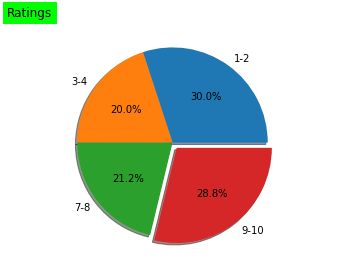

In [49]:
ratingsDICT = {'1-2' : 0, '3-4' : 0, '7-8' : 0, '9-10' : 0}
for rating in tokenisedDF["rating"]:
  if rating == 1.0 or rating == 2.0:
    ratingsDICT["1-2"] += 1
  elif rating == 3.0 or rating == 4.0:
    ratingsDICT["3-4"] += 1
  elif rating == 7.0 or rating == 8.0:
    ratingsDICT["7-8"] += 1
  elif rating == 9.0 or rating == 10.0:
    ratingsDICT["9-10"] += 1

labels = ratingsDICT.keys()
sizes = ratingsDICT.values()
explode = [0, 0, 0, 0.07]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.title(label="Ratings Distribution",
          loc="left",
          pad='20.0',
          backgroundcolor='lime')
plt.show()

We see that there are almost equally numbered negative/positive reviews.